
# 🚲 Bike Rental Dataset
## Exploratory Data Analysis (EDA) & Model Building
**Objective:** Understand data patterns and build a regression model to predict bike rentals (`cnt`)

---


## 1. Import Required Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

sns.set(style="whitegrid")


C:\Users\UJJWAL TOMAR\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 2. Load Dataset

In [2]:

df = pd.read_csv("bike_rent.csv")
df.head()
import numpy as np
import pandas as pd

# Load dataset
# or your actual file name

df.replace([np.inf, -np.inf], np.nan, inplace=True)


df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


## 3. Dataset Overview

In [3]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


In [4]:

df.describe()


,instant,hr,weekday,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,3.003683,189.463088
std,5017.0295,6.914405,2.005771,181.387599
min,1.0000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,1.000000,40.000000
50%,8690.0000,12.000000,3.000000,142.000000
75%,13034.5000,18.000000,5.000000,281.000000
max,17379.0000,23.000000,6.000000,977.000000


## 4. Missing Values Check

In [5]:

df.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## 5. Target Variable Distribution

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


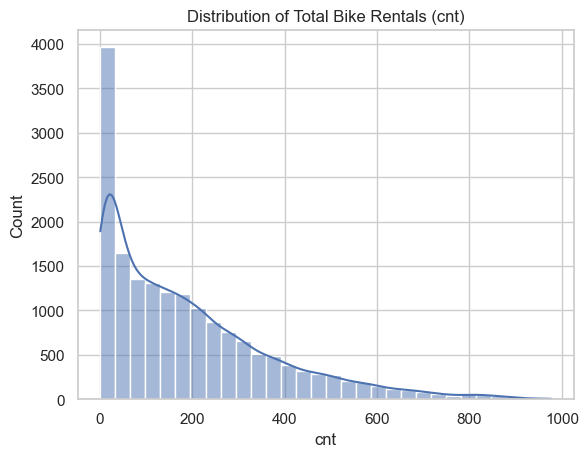

In [6]:

plt.figure()
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title("Distribution of Total Bike Rentals (cnt)")
plt.show()


## 6. Hourly Demand Pattern

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\relational.py:441: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data = grouped.apply(agg, other).reset_index()


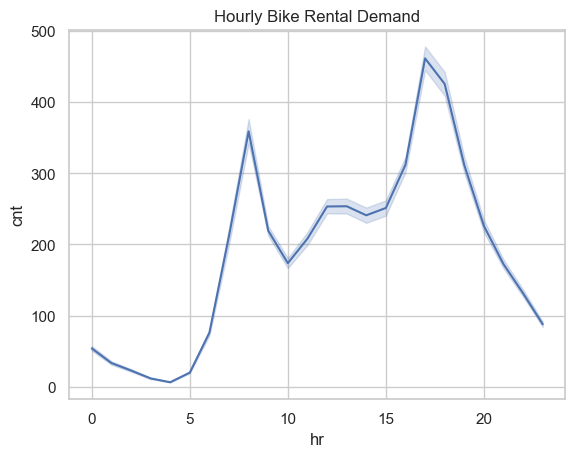

In [7]:

plt.figure()
sns.lineplot(x='hr', y='cnt', data=df)
plt.title("Hourly Bike Rental Demand")
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

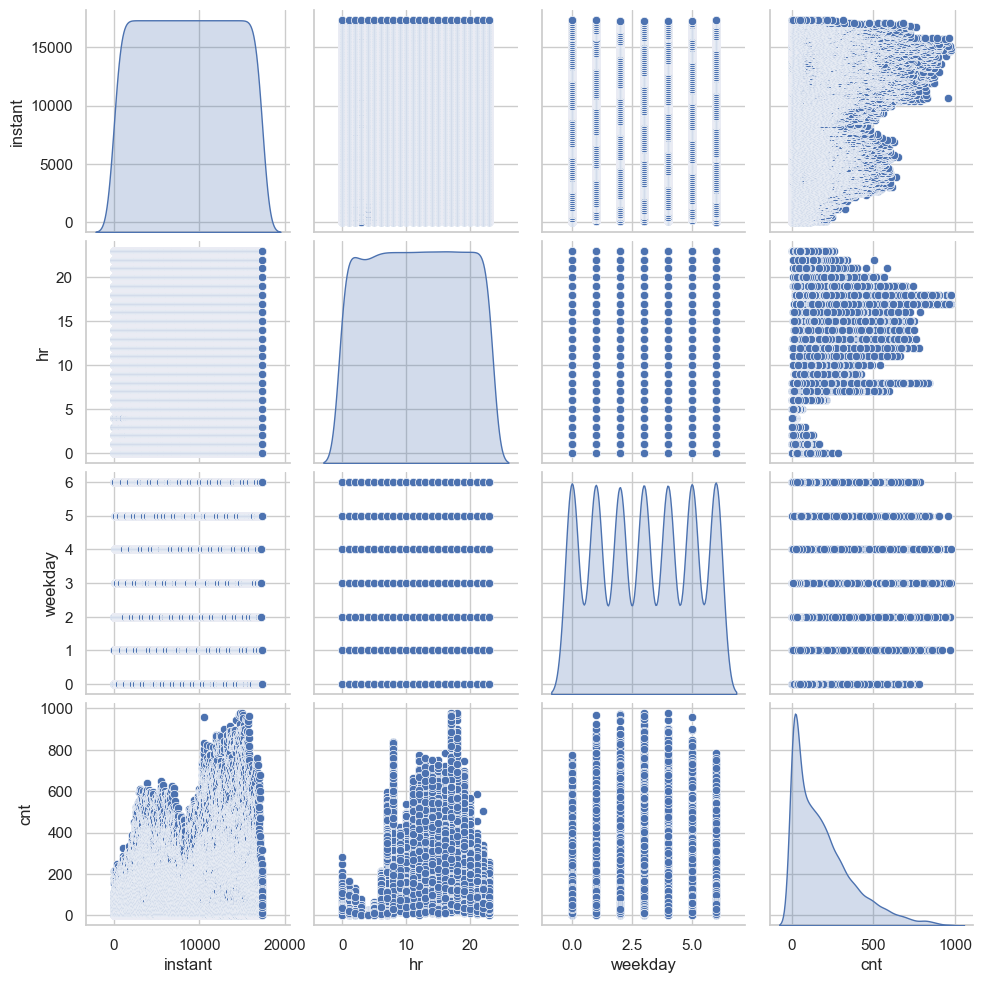

In [8]:
sns.pairplot(df, diag_kind="kde") 
plt.show()


## 7. Season and Weather Impact

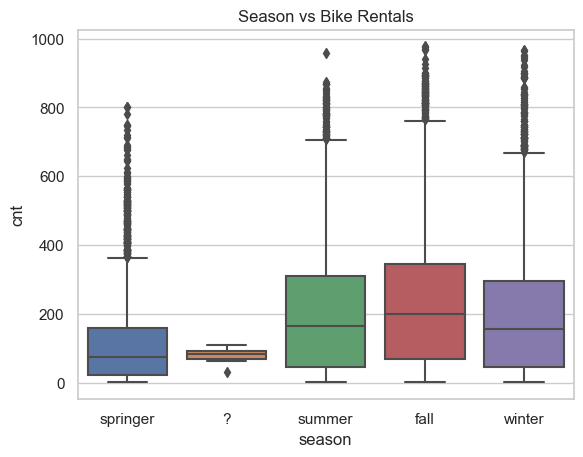

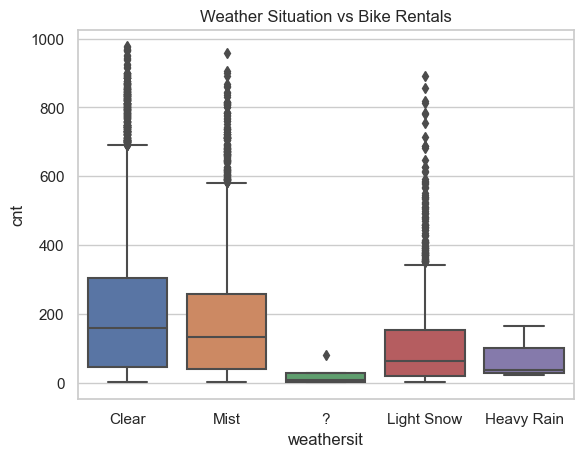

In [9]:

plt.figure()
sns.boxplot(x='season', y='cnt', data=df)
plt.title("Season vs Bike Rentals")
plt.show()

plt.figure()
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title("Weather Situation vs Bike Rentals")
plt.show()


## 8. Correlation Analysis

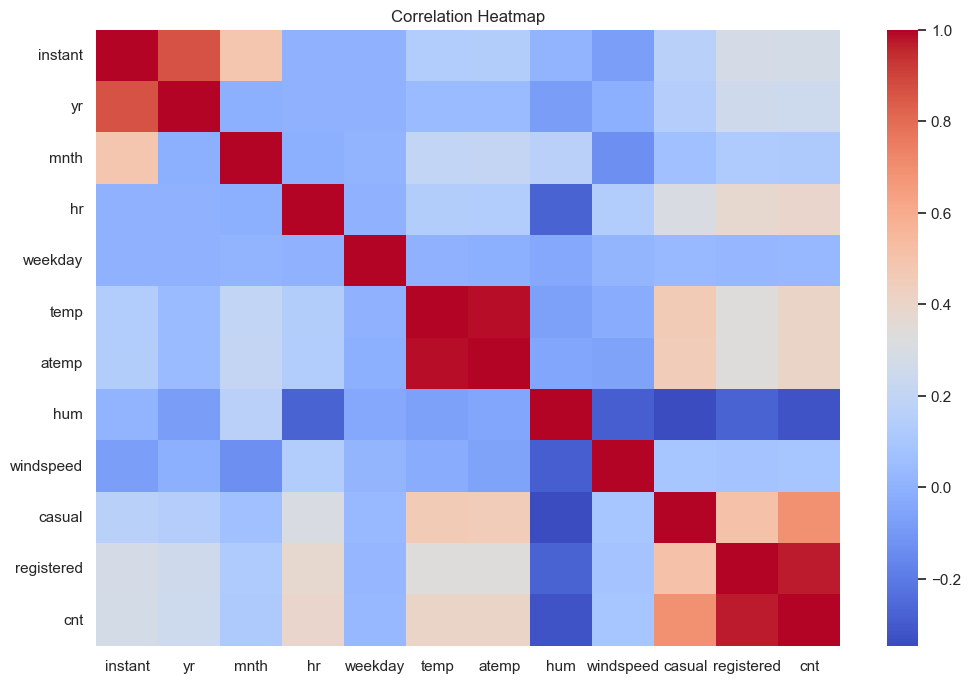

In [10]:
import numpy as np

cols_to_numeric = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'yr', 'mnth']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_for_corr = df.drop(columns=['dteday'])

# Select only numeric columns for correlation
df_numeric = df_for_corr.select_dtypes(include=np.number)

plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 9. Feature Engineering

In [11]:
if 'dteday' in df.columns:
    df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')
    df['day'] = df['dteday'].dt.day
    df['month'] = df['dteday'].dt.month

df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

# Impute missing values for numerical columns introduced by errors='coerce'
numeric_cols_with_potential_nan = ['temp', 'atemp', 'hum', 'windspeed', 'yr', 'mnth']
for col in numeric_cols_with_potential_nan:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

# Only drop columns if they exist to make the cell re-runnable
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=existing_columns_to_drop)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,month,is_weekend
0,springer,2011.0,1.0,0,No,6,No work,Clear,0.24,0.2879,0.810000,0.0,16,1,1,1
1,springer,2011.0,1.0,1,No,6,No work,Clear,0.22,0.2727,0.800000,0.0,40,1,1,1
2,springer,2011.0,1.0,2,No,6,No work,Clear,0.22,0.2727,0.627208,0.0,32,1,1,1
3,springer,2011.0,1.0,3,No,6,No work,Clear,0.24,0.2879,0.750000,0.0,13,1,1,1
4,springer,2011.0,1.0,4,No,6,No work,Clear,0.24,0.2879,0.750000,0.0,1,1,1,1


## 10. Train-Test Split

In [12]:
X = df.drop('cnt', axis=1)

# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 11. Model Building

In [33]:

lr = LinearRegression()
lr.fit(X_train, y_train)


lr.fit(X_train, y_train)
lr = LinearRegression(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'n_estimators'

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression
MAE: 103.72156395632636
RMSE: 137.8989963684732
R2 Score: 0.39946672420014595


In [34]:


rf_optimized = RandomForestRegressor(
    n_estimators=100,      # reduce trees
    max_depth=15,          # limit depth (MOST IMPORTANT)
    min_samples_split=10,  # avoid very small splits
    min_samples_leaf=5,    # reduce leaf nodes
    random_state=42,
    n_jobs=-1
)

rf_optimized.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)




print("Random Forest")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest
MAE: 25.185221470356463
RMSE: 42.4536430998306
R2 Score: 0.9430826338146199


In [16]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("Gradient Boosting Regressor Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_gbr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))
print("R2 Score:", r2_score(y_test, y_pred_gbr))


Gradient Boosting Regressor Performance
MAE: 49.564741325644626
RMSE: 72.64653040080749
R2 Score: 0.8333349179266973


In [17]:
lr_accuracy = r2_score(y_test, y_pred_lr) * 100
print(f"Linear Regression Accuracy: {lr_accuracy:.2f}%")


Linear Regression Accuracy: 39.95%


In [18]:
rf_accuracy = r2_score(y_test, y_pred_rf) * 100
print(f"Random Forest Accuracy: {rf_accuracy:.2f}%")


Random Forest Accuracy: 94.49%


In [19]:
gbr_accuracy = r2_score(y_test, y_pred_gbr) * 100
print(f"Gradient Boosting Accuracy: {gbr_accuracy:.2f}%")


Gradient Boosting Accuracy: 83.33%


In [20]:
model_comparison = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Random Forest",
        "Gradient Boosting"
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_gbr)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_gbr))
    ]
})

model_comparison



,Model,R2 Score,RMSE
0,Linear Regression,0.399467,137.898996
1,Random Forest,0.944864,41.784171
2,Gradient Boosting,0.833335,72.646530




saving model

In [21]:
import pickle

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:


# ===== IMPORTS =====
import pickle
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# ===== TRAIN OPTIMIZED RANDOM FOREST =====
rf_optimized = RandomForestRegressor(
    n_estimators=100,      # fewer trees → smaller size
    max_depth=15,          # limit tree depth → VERY IMPORTANT
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

# X_train, y_train MUST already exist in your notebook
rf_optimized.fit(X_train, y_train)


# ===== EVALUATE MODEL =====
y_pred = rf_optimized.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


# ===== SAVE SMALL MODEL FILE =====
with open("bike_model_optimized.pkl", "wb") as f:
    pickle.dump(rf_optimized, f)

print("✅ Optimized model saved as bike_model_optimized.pkl")



In [24]:
with open("scaler.pkl2", "wb") as f:
    pickle.dump(scaler, f)


In [25]:
#loading and testing

In [26]:
loaded_model = pickle.load(open('bike_model.pkl','rb'))
loaded_model.predict(X_test[:5])

array([404.23 , 102.295,  11.005, 519.395,  15.23 ])

In [27]:
X_test

,yr,mnth,hr,weekday,temp,atemp,hum,windspeed,day,month,...,season_summer,season_winter,holiday_No,holiday_Yes,workingday_No work,workingday_Working Day,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist
12830,2012.0,6.0,19,6,0.80,0.6970,0.27,0.1940,23,6,...,False,False,True,False,True,False,True,False,False,False
8688,2012.0,1.0,20,1,0.24,0.2273,0.41,0.2239,2,1,...,False,False,False,True,True,False,True,False,False,False
7091,2011.0,10.0,2,5,0.32,0.3030,0.66,0.2836,28,10,...,False,True,True,False,False,True,True,False,False,False
12230,2012.0,5.0,19,2,0.78,0.7121,0.52,0.3582,29,5,...,True,False,True,False,False,True,True,False,False,False
431,2011.0,1.0,0,4,0.26,0.2273,0.56,0.3881,20,1,...,False,False,True,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6759,2011.0,10.0,5,5,0.56,0.5303,0.94,0.1642,14,10,...,False,True,True,False,False,True,False,False,False,True
13989,2012.0,8.0,2,6,0.64,0.5909,0.78,0.1940,11,8,...,False,False,True,False,True,False,False,False,True,False
173,2011.0,1.0,12,6,0.20,0.1818,0.59,0.3582,8,1,...,False,False,True,False,True,False,False,False,False,True
16192,2012.0,11.0,10,1,0.48,0.4697,0.77,0.1642,12,11,...,False,True,False,True,True,False,True,False,False,False
